In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from os import path
from sklearn.ensemble import IsolationForest
from google.colab import files


uploaded = files.upload()


Saving Monthly gasoline demand Ontario gallon millions 1960  1975.csv to Monthly gasoline demand Ontario gallon millions 1960  1975 (1).csv


In [2]:
df = pd.read_csv('Monthly gasoline demand Ontario gallon millions 1960  1975.csv', index_col=0)

In [3]:
df

,x
1,87695
2,86890
3,96442
4,98133
5,113615
...,...
188,244642
189,237579
190,237579
191,217775


In [4]:
n_vars = 1 if type(df) is list else df.shape[1]
cols = list()
for i in range(1, 0, -1):
    cols.append(df.shift(i))
for i in range(0, 1):
    cols.append(df.shift(-i))
# put it all together
agg = pd.concat(cols, axis=1)
agg.dropna(inplace=True)
list_for_forecast = agg.values

In [5]:
def random_forest_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [6]:
predictions = list()
size = int(len(list_for_forecast) * 0.9)
train, test = list_for_forecast[0:size], list_for_forecast[size:len(list_for_forecast)]
history = [x for x in train]

for i in range(len(test)):
    testX, testy = test[i, :-1], test[i, -1]
    yhat = random_forest_forecast(history, testX)
    predictions.append(yhat)
    history.append(test[i])

error = mean_absolute_error(test[:, -1], predictions)
print("Random Forest error: ", error)

Random Forest error:  20269.233900000003


In [7]:
print("Random Forest metrics: ")
print("RMSE:", np.sqrt(mean_squared_error(test[:, -1], predictions)))
print("MAPE:", mean_absolute_percentage_error(test[:, -1], predictions))
print("MAE:", mean_absolute_error(test[:, -1], predictions))
print("R2: ", r2_score(test[:, -1], predictions))

Random Forest metrics: 
RMSE: 24542.839839051958
MAPE: 0.08765798574673814
MAE: 20269.233900000003
R2:  -0.5050664937073785


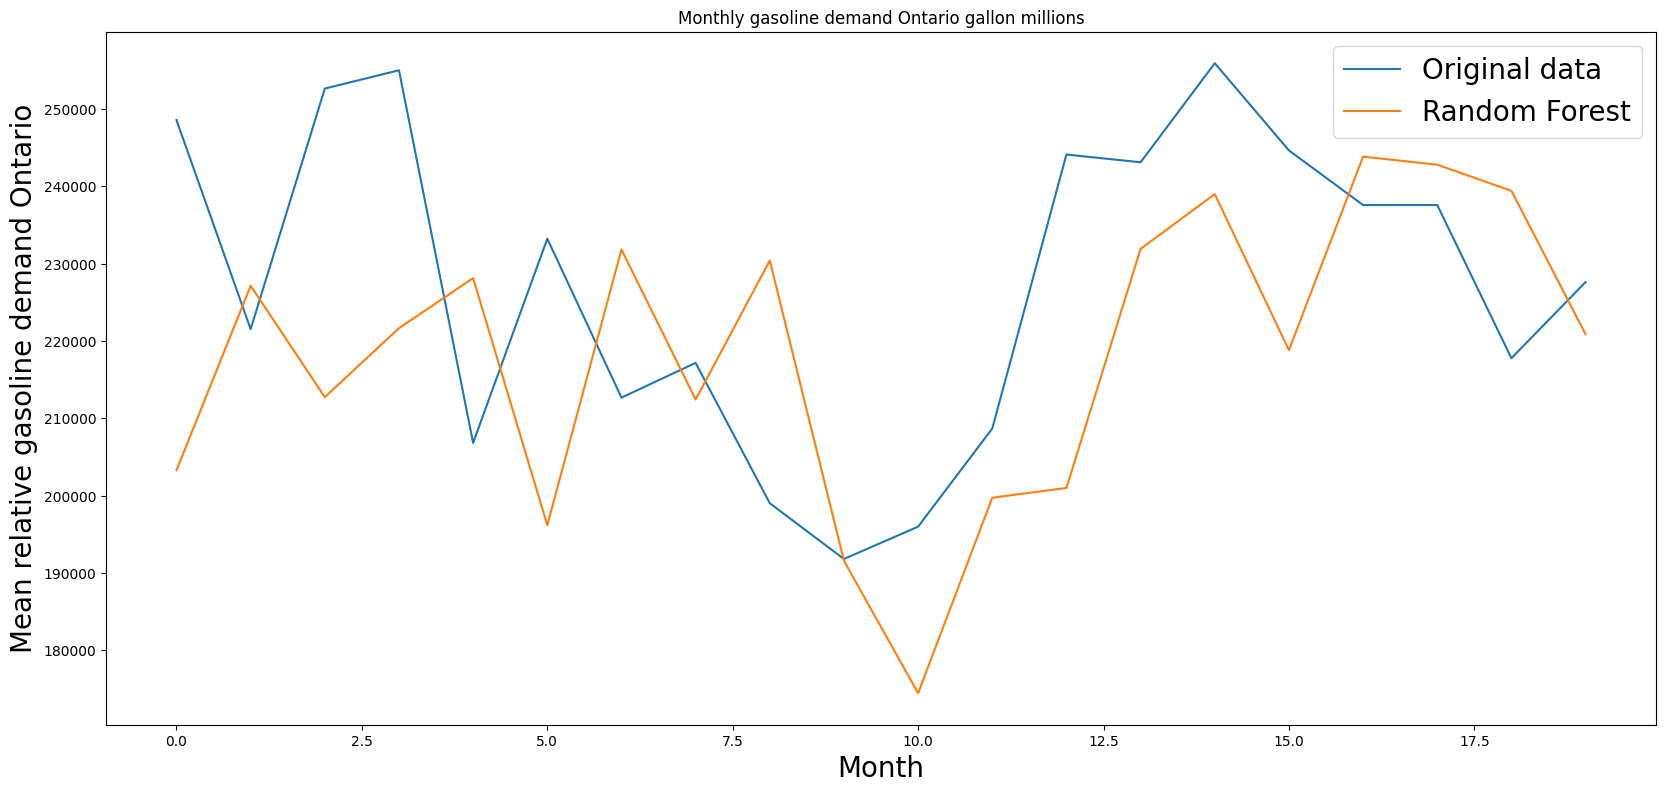

In [14]:
fig = plt.figure(figsize=(20, 9))
plt.plot(test[:, -1], label='Original data')
plt.plot(predictions, label='Random Forest')
plt.legend(fontsize="20")
plt.title('Monthly gasoline demand Ontario gallon millions')
plt.ylabel('Mean relative gasoline demand Ontario', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

In [9]:
model = IsolationForest(contamination=0.004)
model.fit(df[['x']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.004)

In [10]:
df['outliers'] = pd.Series(model.predict(df[['x']])).apply(lambda x: 'yes' if (x == -1) else 'no' )

In [11]:
df.query('outliers=="yes"')

,x,outliers
1,87695,yes


In [12]:
fig = px.scatter(df.reset_index(), x='index', y='x', color='outliers')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()